<a href="https://colab.research.google.com/github/kanyijohn/Deep-Learning-ML-models/blob/main/RNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-04-22 09:55:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-22 09:55:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-22 09:55:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.5132 - loss: 0.6941 - val_accuracy: 0.5328 - val_loss: 0.6908
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5414 - loss: 0.6890 - val_accuracy: 0.5920 - val_loss: 0.6695
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6098 - loss: 0.6637 - val_accuracy: 0.6113 - val_loss: 0.6568
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.6447 - loss: 0.6323 - val_accuracy: 0.6593 - val_loss: 0.6137
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.6919 - loss: 0.5818 - val_accuracy: 0.7022 - val_loss: 0.5702
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.7386 - loss: 0.5248 - val_accuracy: 0.7162 - val_loss: 0.5551
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.7661 - loss: 0.4882 - val_accuracy: 0.7337 - val_loss: 0.5312
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7936 - loss: 0.4416 - 

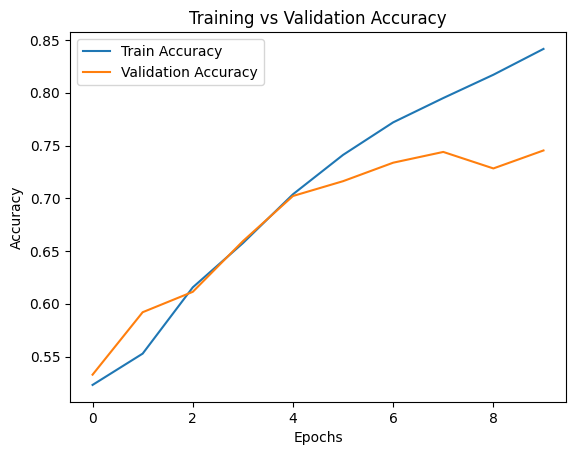

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7457 - loss: 0.5627
Test Accuracy: 0.7453


In [1]:
!pip install numpy tensorflow keras

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# 1. Load GloVe embeddings

# Download GloVe embeddings (e.g., glove.6B.100d.txt)
# and place it in a directory accessible by your code.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Load GloVe embeddings into a dictionary
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


# 2. Prepare IMDB dataset

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(vocab_size, max_length) = (10000, 100)  # 10,000 words, max 100 words per review

# Load data and split into training and testing sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to make them uniform
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')


# 3. Create embedding matrix

# Get the word index from the IMDB dataset
word_index = imdb.get_word_index()

# Create embedding matrix
embedding_dim = 100  # Dimension of GloVe embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


# 4. Build the RNN model with GloVe embeddings

model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
              input_length=max_length, trainable=False),  # Use GloVe embeddings
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))


import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")